### IPL 2022 Capstone Project

**The Indian Premier League (IPL) is a professional T20 cricket league in India, featuring franchises representing cities. This project explores IPL 2022 match-level data to derive meaningful insights and understand match outcomes, player performances, and team dynamics.**

**These are some of the important columns that we'll focus on for meaningful insights in this project.**

**column names: Variable Type**
* date : string  
* venue : string  
* stage : string  
* team1 : string  
* team2 : string  
* toss_winner : string  
* toss_decision : string  
* first_ings_score : integer  
* second_ings_score : integer  
* match_winner : string  
* won_by : string  
* margin : integer  
* player_of_the_match : string  
* top_scorer : string  
* highscore : integer  
* best_bowling : string  
* best_bowling_fgure : string  
gure : string  


### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Loading dataset

In [2]:
df = pd.read_csv('IPL.csv')
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


### Basic Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

Check the size of rows and columns of the dataset

In [4]:
df.shape

(74, 20)

In [5]:
print(f'Rows: {df.shape[0]} Columns: {df.shape[1]}')

Rows: 74 Columns: 20


Now let's see how many columns have null values in total.

In [6]:
df.isnull().sum()

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

**Questions**

1. Which team won the most matches?

In [7]:
match_wins = df['match_winner'].value_counts()
match_wins

match_winner
Gujarat      12
Rajasthan    10
Banglore      9
Lucknow       9
Punjab        7
Delhi         7
Kolkata       6
Hyderabad     6
Chennai       4
Mumbai        4
Name: count, dtype: int64

Text(0.5, 1.0, 'Most match wins')

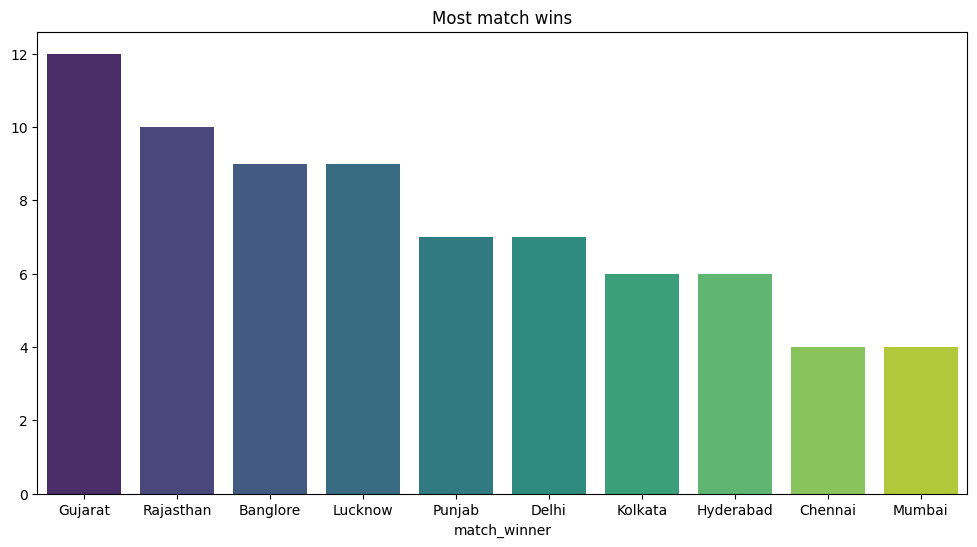

In [8]:
plt.figure(figsize = (12,6))
sns.barplot(x = match_wins.index, y = match_wins.values, palette = 'viridis')
plt.title('Most match wins')

2. Toss Decision Trends

<Axes: xlabel='toss_decision', ylabel='count'>

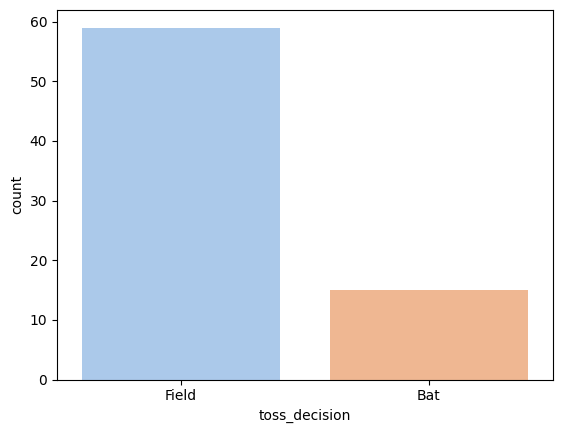

In [9]:
sns.countplot(x= df['toss_decision'], palette='pastel')

3. Toss Winner vs Match Winner

In [10]:
count = df[df['toss_winner'] == df['match_winner']]['match_id'].count()
percentage = (count *100)/df.shape[0]
percentage.round(2)

np.float64(48.65)

4. How do teams win? (Runs vs Wickets)

<Axes: xlabel='won_by', ylabel='count'>

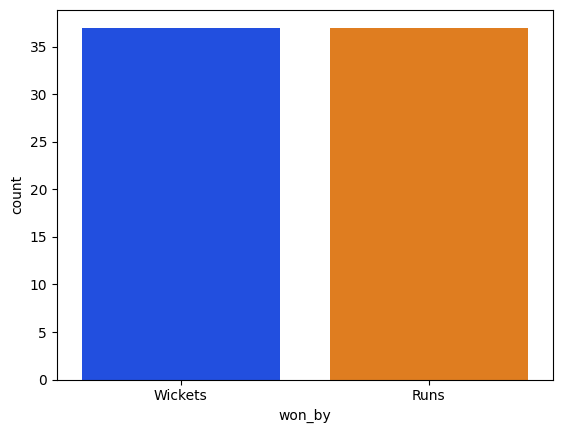

In [11]:
sns.countplot(x=df['won_by'],palette = 'bright')

###  Key Player Performances

1 Most "Player of the Match" Awards

In [12]:
count = df['player_of_the_match'].value_counts().head(10)
count

player_of_the_match
Kuldeep Yadav        4
Jos Buttler          3
Wanindu Hasaranga    2
Umesh Yadav          2
Quinton de Kock      2
Shubman Gill         2
Avesh Khan           2
Dinesh Karthik       2
Hardik Pandya        2
Rahul Tripathi       2
Name: count, dtype: int64

<Axes: ylabel='player_of_the_match'>

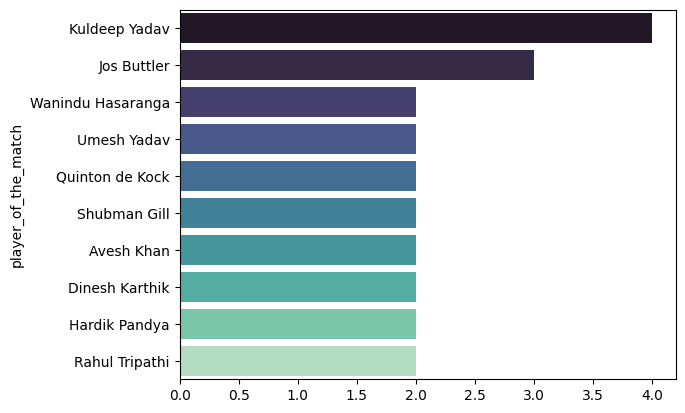

In [13]:
sns.barplot(x = count.values, y = count.index, palette = 'mako')

5 Top Scorers

In [14]:
top_scorer = df.groupby('top_scorer')['highscore'].sum().sort_values(ascending = False).head(5)
top_scorer

top_scorer
Jos Buttler        651
Quinton de Kock    377
KL Rahul           351
Shubman Gill       288
Faf du Plessis     257
Name: highscore, dtype: int64

<Axes: ylabel='top_scorer'>

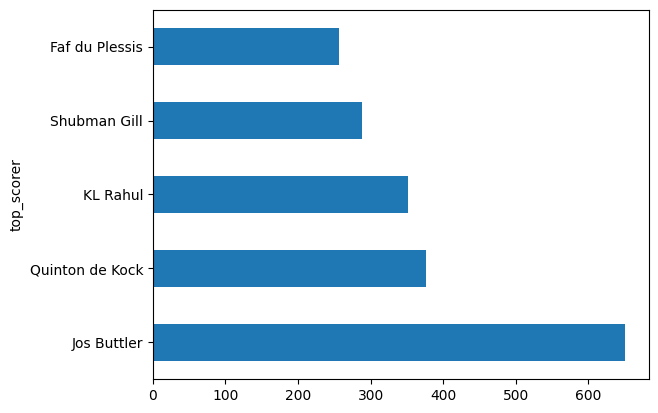

In [15]:
top_scorer.plot(kind='barh')

10 Best Bowling Figures

In [16]:
df['highest_wickets'] = df['best_bowling_figure'].apply(lambda x: x.split('--')[0])
df['highest_wickets'] = df['highest_wickets'].astype(int)
top_bowlers = df.groupby('best_bowling')['highest_wickets'].sum().sort_values(ascending=False).head(10)
top_bowlers

best_bowling
Yuzvendra Chahal     17
Jasprit Bumrah       11
Kuldeep Yadav        11
Rashid Khan          11
Josh Hazlewood       10
Kagiso Rabada        10
Avesh Khan           10
Umran Malik           9
Wanindu Hasaranga     9
T Natarajan           8
Name: highest_wickets, dtype: int64

<Axes: ylabel='best_bowling'>

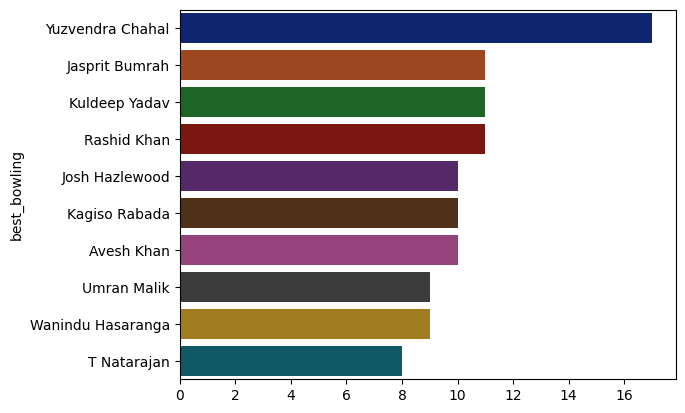

In [17]:
sns.barplot(x=top_bowlers.values,y=top_bowlers.index, palette = 'dark')

###  Venue Analysis

Most Matches Played by Venue

In [18]:
venu_count = df['venue'].value_counts()
venu_count

venue
Wankhede Stadium, Mumbai                        21
Dr DY Patil Sports Academy, Mumbai              20
Brabourne Stadium, Mumbai                       16
Maharashtra Cricket Association Stadium,Pune    13
Eden Gardens, Kolkata                            2
Narendra Modi Stadium, Ahmedabad                 2
Name: count, dtype: int64

<Axes: ylabel='venue'>

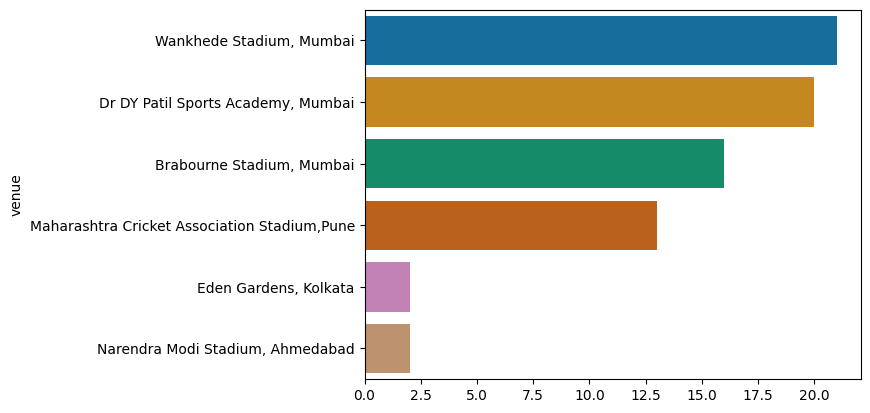

In [19]:
sns.barplot(x = venu_count.values, y= venu_count.index, palette = 'colorblind')

### Custom Questions & Insights
Q1: Who won the highest margin by runs?

In [20]:
df[df['won_by'] == 'Runs'].sort_values(by = 'margin',ascending=False).head(1)[['match_winner','margin']]

,match_winner,margin
54,Chennai,91


Q2: Which player had the highest individual score?

In [21]:
df[df['highscore'] == df['highscore'].max()][['top_scorer','highscore']]

,top_scorer,highscore
65,Quinton de Kock,140


Q3: Which bowler had the best bowling figures?

In [22]:
df[df['highest_wickets'] == df['highest_wickets'].max()][['best_bowling','best_bowling_figure']]

,best_bowling,best_bowling_figure
29,Yuzvendra Chahal,5--40
39,Umran Malik,5--25
53,Wanindu Hasaranga,5--18
55,Jasprit Bumrah,5--10
